In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers


img_width, img_height = 240,320
path_train_img = 'C:\\Users\Anne\\Documents\\GIT\\Cozmo\\01_Collect_Images\\output\\train\\'
path_validation_img = 'C:\\Users\\Anne\\Documents\\GIT\\Cozmo\\01_Collect_Images\\output\\val\\'

epochs = 100
batch_size = 30

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(240,320,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_img = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_img = ImageDataGenerator(rescale=1. / 255)

train_generator = train_img.flow_from_directory(
    path_train_img,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_img.flow_from_directory(
    path_validation_img,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 7873 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [2]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/100
263/263 [==============================] - 299s 1s/step - loss: 0.6842 - accuracy: 0.7637 - val_loss: 0.0895 - val_accuracy: 0.9625
Epoch 2/100
263/263 [==============================] - 294s 1s/step - loss: 0.1876 - accuracy: 0.9470 - val_loss: 0.0514 - val_accuracy: 0.9875
Epoch 3/100
263/263 [==============================] - 293s 1s/step - loss: 0.1217 - accuracy: 0.9696 - val_loss: 0.0595 - val_accuracy: 0.9875
Epoch 4/100
263/263 [==============================] - 295s 1s/step - loss: 0.0888 - accuracy: 0.9770 - val_loss: 0.0289 - val_accuracy: 0.9875
Epoch 5/100
263/263 [==============================] - 298s 1s/step - loss: 0.0747 - accuracy: 0.9822 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 6/100
263/263 [==============================] - 297s 1s/step - loss: 0.0709 - accuracy: 0.9849 - val_loss: 0.0328 - val_accuracy: 0.9875
Epoch 7/100
263/263 [==============================] - 300s 1s/step - loss: 0.0481 - accuracy: 0.9886 - val_loss: 0.0302 - val_accuracy:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 238, 318, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 157, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 117, 157, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 78, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 76, 64)        1

In [4]:
model.save('C:\\Users\\Anne\\Documents\\GIT\\Cozmo\\02_Model\\MyModelhebehshuffled')
model.save_weights('model_weights_shuffle.h5')
model.save('model_keras_shuffle.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Anne\Documents\GIT\Cozmo\02_Model\MyModelhebehshuffled\assets


In [5]:
# Final evaluation of the model
scores = model.evaluate(validation_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


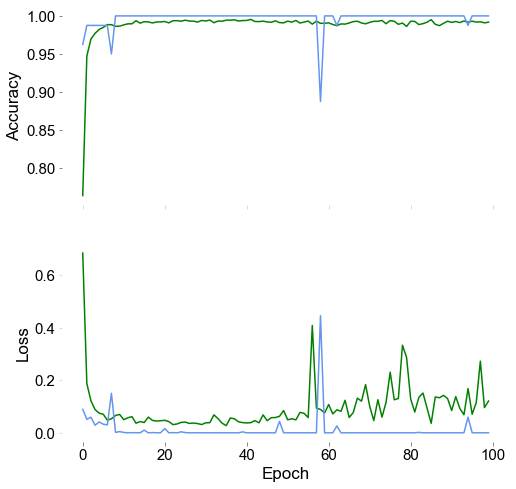

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from IPython.display import Inline


fig, (ax1,ax2) = plt.subplots(2,1,figsize=[8,8], sharex=True)

ax1.plot(history.history['accuracy'], color='green')
ax1.plot(history.history['val_accuracy'], color='cornflowerblue')
ax1.set_ylabel('Accuracy', fontsize=17)
#ax1.set_xlabel('Epoch', fontsize=17)
ax2.plot(history.history['loss'], color='green')
ax2.plot(history.history['val_loss'], color='cornflowerblue')
ax2.set_ylabel('Loss', fontsize=17)
ax2.set_xlabel('Epoch', fontsize=17)
#ax1.legend(['train', 'test'], loc='upper left')
#ax2.legend(['train', 'test'], loc='upper left')
sns.despine(top=True,bottom=True,right=True,left=True)
sns.set(style='white',rc={"lines.linewidth": 3})
ax1.tick_params(axis='y', labelsize=15, color='dimgrey')
ax1.tick_params(axis='x', labelsize=15, color='lightgrey')
ax2.tick_params(axis='x', labelsize=15, color='dimgrey')
ax2.tick_params(axis='y', labelsize=15, color='lightgrey')


fig.savefig('Model_Metrics_NoCallbacks_Aftershuffle.jpeg', bbox_inches='tight')

plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, 7873 // 30+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['C','M','O','Z']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[3 6 5 6]
 [7 5 6 2]
 [5 5 6 4]
 [5 4 3 8]]
Classification Report
              precision    recall  f1-score   support

           C       0.15      0.15      0.15        20
           M       0.25      0.25      0.25        20
           O       0.30      0.30      0.30        20
           Z       0.40      0.40      0.40        20

    accuracy                           0.28        80
   macro avg       0.28      0.28      0.28        80
weighted avg       0.28      0.28      0.28        80

